# Expected Value of Roulette

## Roulette Rules

The objective of roulette is to guess which pocket the ball will fall on when the wheel is spun.  You place your bet, or bets, on any of the numbers on the inside or outside of the table layout before the ball falls within one of the slots. When the croupier says “no more bets”  no one is allowed to add or change their bets. Once the croupier places the dolly on the winning number on the roulette, they will pay out any winning bets and new bets can be placed again. Every number has equal chances of coming up on the wheel. Your chances get slimmer depending on the placement of the bet on the table but the payouts become bigger. Past winning numbers have no effect on future spins.

## Roulette Bets & Payouts
 

No.|Bet Name     |Numbers Selected                                       |Odds|
---|-------------|-------------------------------------------------------|----|
1  |Straight Up  |Bet on 1 number                                        |35:1|
2  |Split        |Bet on 2 adjacent numbers                              |17:1|
3  |Street       |Bet on 3 adjacent numbers                              |11:1|
4  |Corner       |Bet on 4 adjacent numbers                              |8:1 |
5  |Five Line    |Bet on 5 numbers (0-00-1-2-3)                          |6:1 |
6  |Six Line     |Bet on 2 adjacent rows of numbers                      |5:1 |
7  |Dozens       |Bet on 12 consecutive numbers (1st, 2nd, 3rd)          |2:1 |
8  |Columns      |Bet on 12 numbers in a column                          |2:1 |
9  |Low          |Bet on 18 consecutive numbers (1 through 18)           |1:1 |
10 |High         |Bet on 18 consecutive numbers (19 through 36)          |1:1 |
11 |Red or Black |Bet on all reds or all blacks                          |1:1 |
12 |Odd or Even  |Bet on all odd or all even numbers                     |1:1 |

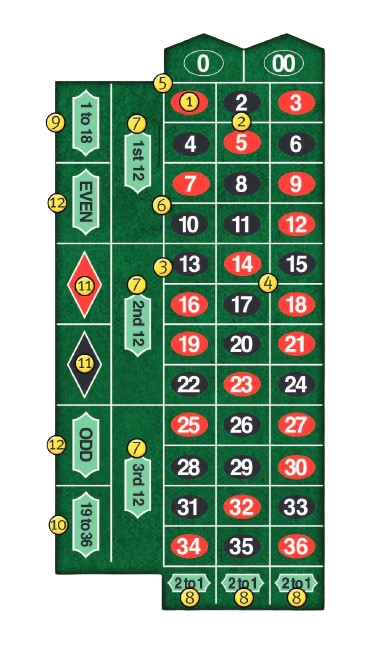

## Expected Value

The __expected value (EV)__ is the average amount a player can expect to win or lose per bet over the long run. It helps determine whether a game is favorable or not from a statistical perspective.

$$
EV = \sum_{i}(x_{i}·p_{i})
$$

Where:
- $x_{i}$ is the __net outcome__ (profit or loss)
- $p_{i}$ is the __probability__ of that outcome
<br>

More specifically,
$$
EV = \sum{\text{(Payout * Probability of Winning) + (Loss * Probability of Losing)}}
$$

In [16]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [1]:
total_num = 38 ## incl. 0 and 00

In [13]:
def ev_roulette(payout, num):
    ev = (payout * (num / 38)) + (-1 * ((38 - num) / 38))
    return ev

In [30]:
bet_names = ['Straight Up', 'Split', 'Street', 'Corner', 'Five Line', 'Six Line', 
            'Dozens', 'Columns', 'Low', 'High', 'Red or Black', 'Odd or Even']

payouts = [35, 17, 11, 8, 6, 5, 2, 2, 1, 1, 1, 1]
payout_strings = [f"{p}:1" for p in payouts]

nums = [1, 2, 3, 4, 5, 6, 12, 12, 18, 18, 18, 18]

ev_output = []

for bet_name, payout, num in zip(bet_names, payouts, nums):
    ev_output.append( round(ev_roulette(payout, num), 3))
    
summary = pd.DataFrame({
    'Bet Name': bet_names,
    'Payout': payout_strings,
    'EV': ev_output
})

In [31]:
summary

,Bet Name,Payout,EV
0,Straight Up,35:1,-0.053
1,Split,17:1,-0.053
2,Street,11:1,-0.053
3,Corner,8:1,-0.053
4,Five Line,6:1,-0.079
5,Six Line,5:1,-0.053
6,Dozens,2:1,-0.053
7,Columns,2:1,-0.053
8,Low,1:1,-0.053
9,High,1:1,-0.053


Mathematically speaking, a player can expect to __lose__ \\$0.053 on average over the long run, no matter which bet they place. The Five line bet is the worst because its expected value is a loss of \\$0.079.

## Does Placing Multiple Bets with Different Wager Amounts Change the EV?

In [75]:
def total_ev_per_dollar(ev1, wager1, ev2, wager2, ev3=None, wager3=None):
    total_ev_dollars = wager1 * ev1 + wager2 * ev2
    total_wager = wager1 + wager2
    
    if ev3 is not None and wager3 is not None:
        total_ev_dollars += wager3 * ev3
        total_wager += wager3
    
    total_ev_dollars = round(total_ev_dollars, 3)
    total_ev_per_dollar = round(total_ev_dollars / total_wager, 3)
    
    return f"Total EV Dollars: {total_ev_dollars} / Total EV Per Dollar: {total_ev_per_dollar}"

### Example #1

In [76]:
# First Bet
EV_1 = ev_roulette(35, 1) #straight up
WAGER_1 = 100

# Second Bet
EV_2 = ev_roulette(17, 2) # split
WAGER_2 = 300

total_ev_per_dollar(EV_1, WAGER_1, EV_2, WAGER_2)

'Total EV Dollars: -21.053 / Total EV Per Dollar: -0.053'

### Example #2

In [77]:
EV_1 = ev_roulette(8, 4) # Corner
WAGER_1 = 500

EV_2 = ev_roulette(1, 18) # Red
WAGER_2 = 300

total_ev_per_dollar(EV_1, WAGER_1, EV_2, WAGER_2)

'Total EV Dollars: -42.105 / Total EV Per Dollar: -0.053'

### Example #3

In [78]:
EV_1 = ev_roulette(6, 5) # Five Line
WAGER_1 = 600

EV_2 = ev_roulette(1, 18) # Even
WAGER_2 = 1000

total_ev_per_dollar(EV_1, WAGER_1, EV_2, WAGER_2)

'Total EV Dollars: -100.0 / Total EV Per Dollar: -0.062'

### Example #4

In [79]:
EV_1 = ev_roulette(2, 12) # 1st Column
WAGER_1 = 500

EV_2 = ev_roulette(2, 12) # 2nd Column 
WAGER_2 = 10000

EV_3 = ev_roulette(2, 12) # 3rd Column
WAGER_3 = 500

total_ev_per_dollar(EV_1, WAGER_1, EV_2, WAGER_2, EV_3, WAGER_3)

'Total EV Dollars: -578.947 / Total EV Per Dollar: -0.053'

## How Long is the "Long Run"?

In [ ]:
def simulate_roulette_profit_per_dollar(numbers, payout, spins=1000, bet_amount=1):
    total_profit = 0
    profit_per_dollar = []

    for i in range(1, spins + 1):
        outcome = random.randint(0, 37)  # 0-36 plus 37 as 00

        if outcome in numbers:
            total_profit += payout * bet_amount  # Win payout times bet
        else:
            total_profit -= bet_amount  # Lose bet

        total_wagered = i * bet_amount
        profit_per_dollar.append(total_profit / total_wagered)

    return profit_per_dollar

### Simulation #1

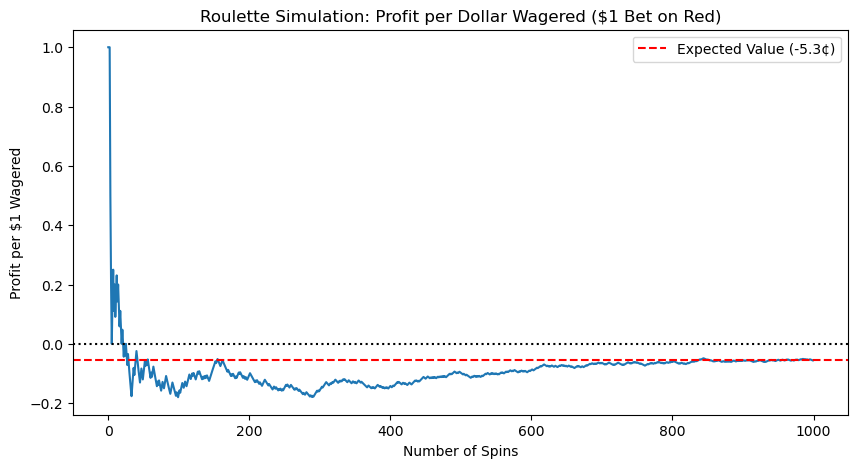

In [142]:
# Red
numbers = {
    1, 3, 5, 7, 9, 12, 14, 16, 18,
    19, 21, 23, 25, 27, 30, 32, 34, 36
}

results = simulate_roulette_profit_per_dollar(numbers, 1, spins=1000)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(results)
plt.title("Roulette Simulation: Profit per Dollar Wagered ($1 Bet on Red)")
plt.xlabel("Number of Spins")
plt.ylabel("Profit per $1 Wagered")
plt.axhline(y=-0.053, color='red', linestyle='--', label='Expected Value (-5.3¢)')
plt.axhline(y=0, color='black', linestyle=':')
plt.legend()
plt.show()

### Simulation #2

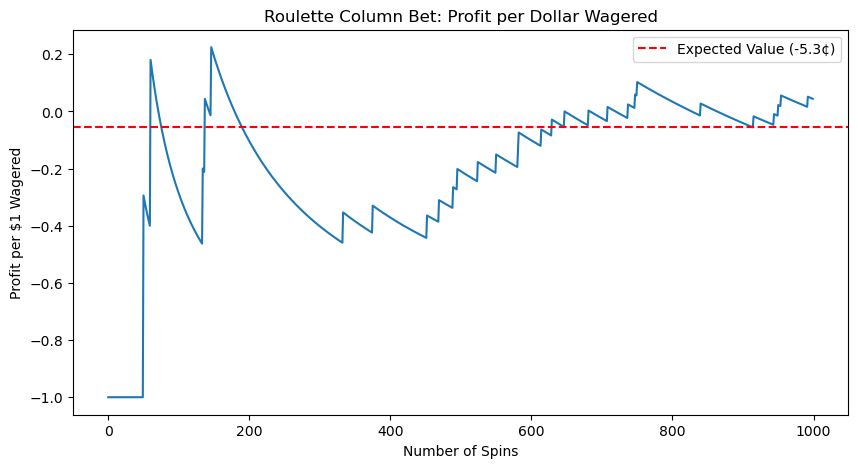

In [145]:
# Straight Up
numbers = {
    1
}

results = simulate_roulette_profit_per_dollar(numbers, payout=35, spins=1000)

plt.figure(figsize=(10, 5))
plt.plot(results)
plt.axhline(y=-0.053, color='red', linestyle='--', label='Expected Value (-5.3¢)')
plt.title("Roulette Column Bet: Profit per Dollar Wagered")
plt.xlabel("Number of Spins")
plt.ylabel("Profit per $1 Wagered")
plt.legend()
plt.show()

### Simulation #3

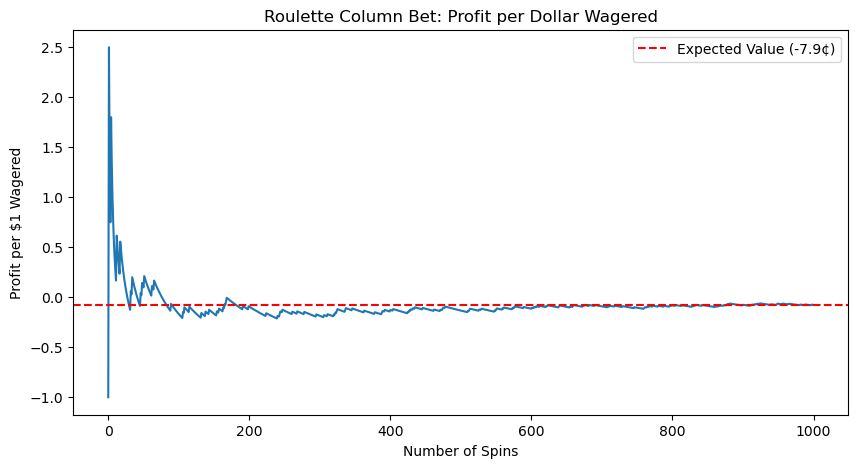

In [146]:
# Five Line
numbers = {
    0, 1,2,3,37
}

results = simulate_roulette_profit_per_dollar(numbers, payout=6, spins=1000)

plt.figure(figsize=(10, 5))
plt.plot(results)
plt.axhline(y=-0.079, color='red', linestyle='--', label='Expected Value (-7.9¢)')
plt.title("Roulette Column Bet: Profit per Dollar Wagered")
plt.xlabel("Number of Spins")
plt.ylabel("Profit per $1 Wagered")
plt.legend()
plt.show()

## Summary

The best mathematical advice is: <br>
__"Roulette is easy and intuitive. And You can place whatever bet(s) you like, but expect to lose 5.3 cents on average for every dollar wagered if you plan to play in the long run. And NEVER bet on the Five Line."__